In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Dimensiones de mundo
m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

Wave_l=500*nm
TL_focal_length = 2*mm

In [3]:
def FFT(f):
     FFT = np.fft.fftshift(np.fft.fft2(f))
     return FFT

def IFFT(f):
     IFFT = (np.fft.ifft2(f))
     return IFFT

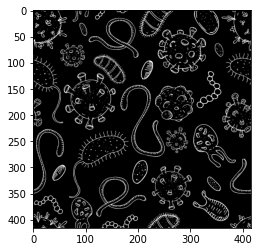

In [4]:
#Imagen a para observar a través del microscopio
obj = cv2.imread('Bacteria.jpg',0)
obj[obj < 15]=0
plt.imshow(obj,"gray")
plt.show()

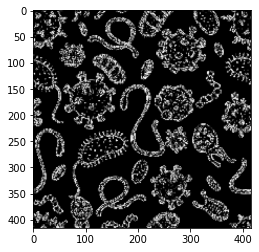

43681
208
208


In [107]:
M,N =np.shape(obj)
dx= 1/(5*nm)
dfx=1/dx
fx = 1/Wave_l*TL_focal_length
sal=np.zeros((M,N),dtype="uint8")
radio = 5*nm
y =int((M)/(2*radio*dx))
x =int((N)/(2*radio*dx))
a = (np.arange(0,x+1,1))
c = 0
for j in (np.arange(1/2,x+1,1)):
    for i in (np.arange(1/2,y+1,1)):
        mask=np.zeros((M,N),dtype="uint8")
        cv2.circle(mask,(int(j*radio*2*dx),int(i*radio*2*dx)),int(radio*dx),1,-1)
        c = c +1
                
        sec = obj*mask
        #pille mi so, este es el kernel del codigo 
        sal[int((i-.5)*radio*2*dx):int((i+.5)*radio*2*dx),int((j-.5)*radio*2*dx):int((j+.5)*radio*2*dx)] = np.sum(sec)
    
        
    
plt.imshow(sal,"gray")
plt.show()
print(c)
print(x)
print(y)